In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's continue with our NYC 311 service requests example.

In [2]:
complaints = pd.read_csv('311-service-requests.csv', dtype = {'Incident Zip' : np.character})

## Selecting only noise complaints

I'd like to know which borough has the most noise complaints. 

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [3]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [4]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Le

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [5]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [6]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


## A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [7]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [8]:
np.array([1,2,3])

array([1, 2, 3])

In [9]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [10]:
arr = np.array([1,2,3])

In [11]:
arr != 2

array([ True, False,  True])

In [12]:
arr[arr != 2]

array([1, 3])

## So, which borough has the most noise complaints?

In [13]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [14]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [15]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

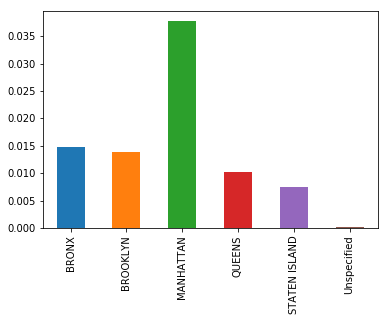

In [16]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

In [21]:
# 1. What are the most common descriptions of a noise complaint
noise_complaints['Descriptor'].value_counts()

Loud Talking        986
Loud Music/Party    942
Name: Descriptor, dtype: int64

In [30]:
# 2. Filter so that Agency is only NYPD
nypd = complaints[complaints['Agency'] == 'NYPD']
nypd

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634378,-73.969462,"(40.63437840816299, -73.96946177104543)"


In [29]:
# 3. Filter so that agency is NYPD and only show columns 'Agency Name' and 'Complaint Type'
complaints[complaints['Agency'] == 'NYPD'][['Agency Name', 'Complaint Type']]

,Agency Name,Complaint Type
0,New York City Police Department,Noise - Street/Sidewalk
1,New York City Police Department,Illegal Parking
2,New York City Police Department,Noise - Commercial
3,New York City Police Department,Noise - Vehicle
5,New York City Police Department,Noise - Commercial
6,New York City Police Department,Blocked Driveway
7,New York City Police Department,Noise - Commercial
8,New York City Police Department,Noise - Commercial
9,New York City Police Department,Noise - Commercial
10,New York City Police Department,Noise - House of Worship
